In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables in SQLalchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
from datetime import timedelta

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)
#Hawaii = Base.classes.hawaii

# reflect the tables
Base.classes.keys()
#station = Base.classes.station
#measurement = Base.classes.measurement

/var/folders/r7/5rnhtw1s0kd514zcq5h7swb40000gn/T/ipykernel_32990/386937400.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with=engine, reflect=True)


['measurement', 'station']

In [6]:
# View all of the classes that automap found
#columns = inspector.get_columns('hawaii')
#for c in columns:
    #print(c['name'], c["type"])


In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

#inspector = inspect(engine)
#inspector.get_table_names()

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
end_date = session.query(func.max(measurement.date)).first()
date_new = pd.to_datetime(end_date)

print(date_new)

DatetimeIndex(['2017-08-23'], dtype='datetime64[ns]', freq=None)


2016-08-23 00:00:00


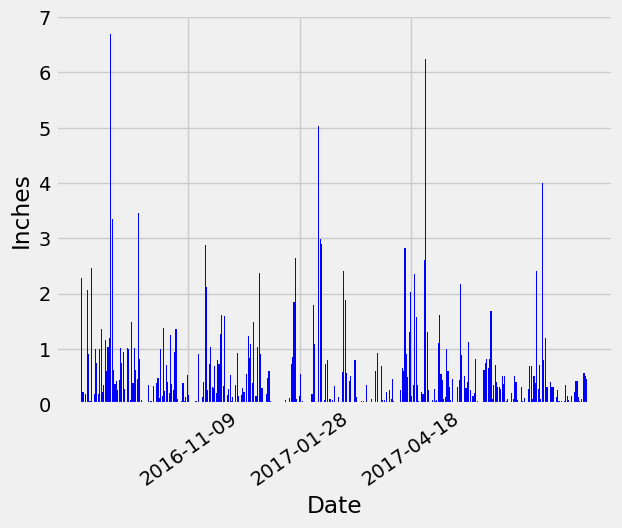

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
p_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(p_year)

#end_date_obj = dt.strptime(end_date, "%Y-%m-%d")
#p_year = date_new.date - dt.timedelta(days=365)
#end_date_obj = dt(end_date)
#start_date = end_date_obj - timedelta(days=365)
#start_date_obj = dt(start_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= p_year).all()
#print(results)


#Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_year = [{"date": row[0], "prcp": row[1]} for row in results]
df = pd.DataFrame(rain_year, columns=["date", "prcp"])

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
x_column = 'date'
y_column = 'prcp'

#df.plot(kind='bar', stacked=True, width=1)
plt.bar(df[x_column], df[y_column], color='blue')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(["2016-11-09", "2017-01-28", "2017-04-18"], rotation=35)

plt.show() 

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe(include = 'all')
print(summary)

              date         prcp
count         2223  2015.000000
unique         365          NaN
top     2016-08-24          NaN
freq             7          NaN
mean           NaN     0.176462
std            NaN     0.460288
min            NaN     0.000000
25%            NaN     0.000000
50%            NaN     0.020000
75%            NaN     0.130000
max            NaN     6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc())
for station in station_activity:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
mean = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(min)  
print(max)
print(mean)
#session.query(min = (measurement.station == 'USC00519281')func.min() #func.max, func.avg

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

Text(0.5, 4.183333333333314, 'Temp')

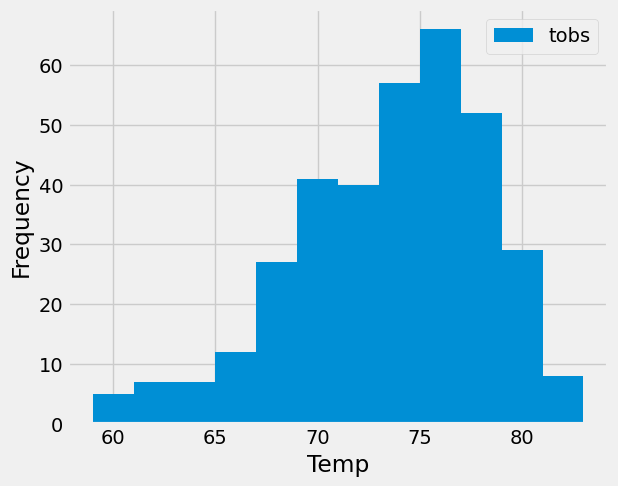

In [24]:
temps = session.query(measurement.tobs).filter(measurement.date >= p_year).filter(measurement.station == 'USC00519281').all()
print(temps)
#temp_year = [{"date": row[0], "tobs": row[1]} for row in temps]
#df2 = pd.DataFrame(temp_year, columns=["date", "tobs"])
df2 = pd.DataFrame(temps, columns=["tobs"])
print(df2) 

df2.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temp")


[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), 

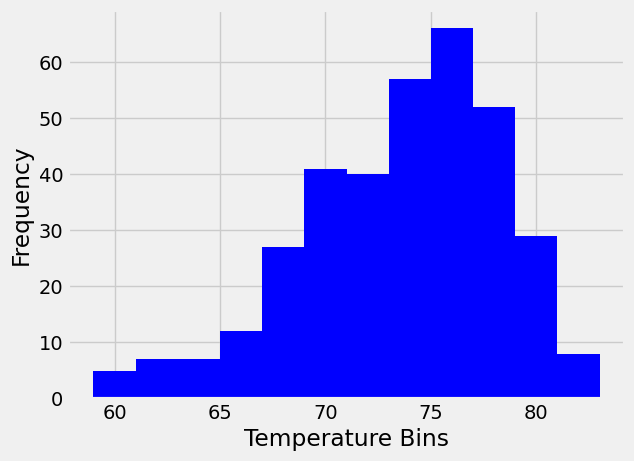

In [13]:

temps = session.query(measurement.tobs).filter(measurement.date >= p_year).filter(measurement.station == 'USC00519281').all()
print(temps)
#temp_year = [{"date": row[0], "tobs": row[1]} for row in temps]
#df2 = pd.DataFrame(temp_year, columns=["date", "tobs"])
df2 = pd.DataFrame(temps, columns=["tobs"])

plt.hist(df2['tobs'], bins=12, color='blue')
plt.xlabel('Temperature Bins')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#temps = session.query(measurement.date, measurement.tobs).filter(measurement.date >= p_year).filter(measurement.station == 'USC00519281').all()
temps = session.query(measurement.date).filter(measurement.date >= p_year).filter(measurement.station == 'USC00519281').all()
print(temps)
#temp_year = [{"date": row[0], "tobs": row[1]} for row in temps]
#df2 = pd.DataFrame(temp_year, columns=["date", "tobs"])
df2 = pd.DataFrame(temps, columns=["tobs"])
print(df2) 

# Define the number of bins you want
bins = 12

df2['bin_number'] = pd.qcut(df2['tobs'], q=bins, labels=False)
#binned_df = pd.DataFrame(temp_year, )
binned_df = df2.groupby('bin_number').size().reset_index(name='Count')


#joined_df = pd.merge(binned_df, df2, how="outer", on="none")
#rint(joined_df)

# Use Pandas Plotting with Matplotlib to plot the data
x_column = 'tobs'
y_column = 'Count'

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(binned_df['bin_number'], binned_df['Count'], color='blue')
plt.xlabel('Temperature Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=35)
plt.show()


[('2016-08-24',), ('2016-08-25',), ('2016-08-26',), ('2016-08-27',), ('2016-08-28',), ('2016-08-29',), ('2016-08-30',), ('2016-08-31',), ('2016-09-01',), ('2016-09-02',), ('2016-09-03',), ('2016-09-04',), ('2016-09-05',), ('2016-09-06',), ('2016-09-07',), ('2016-09-08',), ('2016-09-09',), ('2016-09-10',), ('2016-09-11',), ('2016-09-12',), ('2016-09-13',), ('2016-09-14',), ('2016-09-15',), ('2016-09-16',), ('2016-09-17',), ('2016-09-18',), ('2016-09-19',), ('2016-09-20',), ('2016-09-21',), ('2016-09-22',), ('2016-09-23',), ('2016-09-24',), ('2016-09-25',), ('2016-09-26',), ('2016-09-27',), ('2016-09-28',), ('2016-09-29',), ('2016-09-30',), ('2016-10-01',), ('2016-10-02',), ('2016-10-03',), ('2016-10-04',), ('2016-10-05',), ('2016-10-06',), ('2016-10-07',), ('2016-10-08',), ('2016-10-09',), ('2016-10-10',), ('2016-10-11',), ('2016-10-12',), ('2016-10-13',), ('2016-10-14',), ('2016-10-15',), ('2016-10-16',), ('2016-10-17',), ('2016-10-18',), ('2016-10-19',), ('2016-10-20',), ('2016-10-21'

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Close Session

In [ ]:
# Close Session
session.close()